### Wrangle Data

The following data was acquired from the Austin Animal Center and was last updated October 11th, 2021. There are two different files. One is for the animal center intakes and the other is for the animal center outcomes. I plan on merging both of these files so that I have information on which animals were adopted and which weren't. I can't just use the outcomes file because it only includes the animals that had a certain outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Intake Data

In [2]:
intakes = pd.read_csv('Austin_Animal_Center_Intakes.csv')

In [3]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132220 non-null  object
 1   Name              91800 non-null   object
 2   DateTime          132220 non-null  object
 3   MonthYear         132220 non-null  object
 4   Found Location    132220 non-null  object
 5   Intake Type       132220 non-null  object
 6   Intake Condition  132220 non-null  object
 7   Animal Type       132220 non-null  object
 8   Sex upon Intake   132219 non-null  object
 9   Age upon Intake   132220 non-null  object
 10  Breed             132220 non-null  object
 11  Color             132220 non-null  object
dtypes: object(12)
memory usage: 12.1+ MB


Key Takeaways:
* There are 132,220 entries.
* MonthYear appears to be the same info as DateTime, so I can drop it. I think I will create a new column called 'time_at_shelter' and investigate for a relationship with adoptability.
* There are a few null values, but most of them can be dropped without worry.
* I will drop 'Name' because it won't have any bearing on adoptability
* I will also drop 'Found Location' because it shouldn't matter.
* I will drop 'DateTime' after converting it to a datetime object and creating a new column called intake_date.
* I will rename the 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', and 'Age upon Intake' columns
* There is a single null for 'Sex upon Intake'. I will probably just guess the sex, but may end up dropping it.
* The age column can be dropped since I can calculate the age_in_days with the next data set.
* The Sex upon Intake column can be dropped. I will use the same information from the outcomes dataset to create the columns I want.

In [5]:
intakes = intakes.drop(columns = ['Name', 'MonthYear', 'Found Location', 'Age upon Intake', 'Sex upon Intake'])

In [6]:
intakes.rename(columns = {
    'Intake Type': 'intake_type',
    'Intake Condition': 'intake_condition',
    'Animal Type': 'animal_type',
}, inplace = True)

In [7]:
#Assume the animal with a missing sex value is a netured male
intakes = intakes.fillna('Neutered Male')

In [8]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132220 non-null  object
 1   DateTime          132220 non-null  object
 2   intake_type       132220 non-null  object
 3   intake_condition  132220 non-null  object
 4   animal_type       132220 non-null  object
 5   Breed             132220 non-null  object
 6   Color             132220 non-null  object
dtypes: object(7)
memory usage: 7.1+ MB


In [9]:
intakes.isnull().sum()

Animal ID           0
DateTime            0
intake_type         0
intake_condition    0
animal_type         0
Breed               0
Color               0
dtype: int64

In [10]:
#Convert 'DateTime' to datetime object
intakes.DateTime = pd.to_datetime(intakes.DateTime)

In [11]:
#Create new column 'intake_date' then drop 'DateTime'
intakes['intake_date'] = pd.to_datetime(intakes.DateTime.dt.date)
intakes = intakes.drop('DateTime', axis = 1)

In [12]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         132220 non-null  object        
 1   intake_type       132220 non-null  object        
 2   intake_condition  132220 non-null  object        
 3   animal_type       132220 non-null  object        
 4   Breed             132220 non-null  object        
 5   Color             132220 non-null  object        
 6   intake_date       132220 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 7.1+ MB


In [13]:
#Now order the dataframe by Animal ID and intake_date.
#Then remove duplicates but leave the latest observation
intakes = intakes.sort_values(by = ['Animal ID', 'intake_date'])

In [14]:
intakes.head()

,Animal ID,intake_type,intake_condition,animal_type,Breed,Color,intake_date
84165,A006100,Public Assist,Normal,Dog,Spinone Italiano Mix,Yellow/White,2014-03-07
3988,A006100,Public Assist,Normal,Dog,Spinone Italiano Mix,Yellow/White,2014-12-19
18633,A006100,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,2017-12-07
65397,A047759,Owner Surrender,Normal,Dog,Dachshund,Tricolor,2014-04-02
88961,A134067,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,2013-11-16


In [15]:
#Remove duplicates
intakes = intakes.drop_duplicates(subset = 'Animal ID', keep = 'last', ignore_index = True)

In [16]:
intakes.head()

,Animal ID,intake_type,intake_condition,animal_type,Breed,Color,intake_date
0,A006100,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,2017-12-07
1,A047759,Owner Surrender,Normal,Dog,Dachshund,Tricolor,2014-04-02
2,A134067,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,2013-11-16
3,A141142,Stray,Aged,Dog,Labrador Retriever/Pit Bull,Black/White,2013-11-16
4,A163459,Stray,Normal,Dog,Miniature Schnauzer Mix,Black/Gray,2014-11-14


In [17]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118225 entries, 0 to 118224
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         118225 non-null  object        
 1   intake_type       118225 non-null  object        
 2   intake_condition  118225 non-null  object        
 3   animal_type       118225 non-null  object        
 4   Breed             118225 non-null  object        
 5   Color             118225 non-null  object        
 6   intake_date       118225 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 6.3+ MB


### Acquire Outcome Data

In [18]:
outcomes = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [19]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [20]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132327 non-null  object
 1   Name              91926 non-null   object
 2   DateTime          132327 non-null  object
 3   MonthYear         132327 non-null  object
 4   Date of Birth     132327 non-null  object
 5   Outcome Type      132302 non-null  object
 6   Outcome Subtype   60804 non-null   object
 7   Animal Type       132327 non-null  object
 8   Sex upon Outcome  132326 non-null  object
 9   Age upon Outcome  132307 non-null  object
 10  Breed             132327 non-null  object
 11  Color             132327 non-null  object
dtypes: object(12)
memory usage: 12.1+ MB


Key Takeaways:
* There are 127 more entries here than in the intakes dataset for some reason. 
* The Name column can be dropped
* The DateTime column will be dropped after creating a new column called 'outcome_date'. I will also need to use it to calculate time at shelter.
* The MonthYear column can be dropped
* The Date of Birth column will be dropped after creating a new column called 'outcome_age'
* The Outcome type column will be renamed
* I will also drop all rows where the outcome type is transfer, since I cannot tell if these animals were ever adopted or not.
* I only need to know if the animal was adopted or not, so outcome subtype can be dropped.
* The Animal Type column can be dropped since it should be the same as the previous dataset
* The Sex upon Outcome column will be used to set up two new columns. The first will be the sex of the animal, and the second will be whether or not the animal was spayed or neutered.
* The Age upon Outcome column will be dropped
* The Breed and Color columns will be dropped since that information is in the first dataset

In [21]:
#convert DateTime column to datetime object and then create new column 'outcome_date'
outcomes.DateTime = pd.to_datetime(outcomes.DateTime)

In [22]:
outcomes['outcome_date'] = pd.to_datetime(outcomes.DateTime.dt.date)

In [23]:
#convert date of birth to datetime object and then create new column 'age_in_days'
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'])

In [24]:
outcomes['age_in_days'] = (outcomes.outcome_date - outcomes['Date of Birth']) // pd.Timedelta('1d')

In [25]:
outcomes = outcomes.drop(columns = [
    'Name',
    'DateTime',
    'MonthYear',
    'Date of Birth',
    'Outcome Subtype',
    'Animal Type',
    'Age upon Outcome',
    'Breed',
    'Color'
])

In [26]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         132327 non-null  object        
 1   Outcome Type      132302 non-null  object        
 2   Sex upon Outcome  132326 non-null  object        
 3   outcome_date      132327 non-null  datetime64[ns]
 4   age_in_days       132327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.0+ MB


In [27]:
outcomes.rename(columns = {'Outcome Type':'outcome_type'}, inplace = True)

In [28]:
#Now order the dataframe by Animal ID and intake_date.
#Then remove duplicates but leave the latest observation
outcomes = outcomes.sort_values(by = ['Animal ID', 'outcome_date'])

In [29]:
outcomes.head()

,Animal ID,outcome_type,Sex upon Outcome,outcome_date,age_in_days
106962,A006100,Return to Owner,Neutered Male,2014-03-08,2434
52564,A006100,Return to Owner,Neutered Male,2014-12-20,2721
94209,A006100,Return to Owner,Neutered Male,2017-12-07,3804
36294,A047759,Transfer,Neutered Male,2014-04-07,3657
75671,A134067,Return to Owner,Neutered Male,2013-11-16,5875


In [30]:
#Drop duplicates
outcomes = outcomes.drop_duplicates(subset = 'Animal ID', keep = 'last', ignore_index = True)

In [31]:
outcomes.head()

,Animal ID,outcome_type,Sex upon Outcome,outcome_date,age_in_days
0,A006100,Return to Owner,Neutered Male,2017-12-07,3804
1,A047759,Transfer,Neutered Male,2014-04-07,3657
2,A134067,Return to Owner,Neutered Male,2013-11-16,5875
3,A141142,Return to Owner,Spayed Female,2013-11-17,5648
4,A163459,Return to Owner,Intact Female,2014-11-14,5505


In [32]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118342 entries, 0 to 118341
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         118342 non-null  object        
 1   outcome_type      118321 non-null  object        
 2   Sex upon Outcome  118341 non-null  object        
 3   outcome_date      118342 non-null  datetime64[ns]
 4   age_in_days       118342 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.5+ MB


### Merge the Intake and Outcome dataframes on Animal ID

In [33]:
animals = intakes.merge(right = outcomes, how = 'left', on = 'Animal ID')

In [34]:
animals.head()

,Animal ID,intake_type,intake_condition,animal_type,Breed,Color,intake_date,outcome_type,Sex upon Outcome,outcome_date,age_in_days
0,A006100,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,2017-12-07,Return to Owner,Neutered Male,2017-12-07,3804.0
1,A047759,Owner Surrender,Normal,Dog,Dachshund,Tricolor,2014-04-02,Transfer,Neutered Male,2014-04-07,3657.0
2,A134067,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,2013-11-16,Return to Owner,Neutered Male,2013-11-16,5875.0
3,A141142,Stray,Aged,Dog,Labrador Retriever/Pit Bull,Black/White,2013-11-16,Return to Owner,Spayed Female,2013-11-17,5648.0
4,A163459,Stray,Normal,Dog,Miniature Schnauzer Mix,Black/Gray,2014-11-14,Return to Owner,Intact Female,2014-11-14,5505.0


In [35]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118225 entries, 0 to 118224
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         118225 non-null  object        
 1   intake_type       118225 non-null  object        
 2   intake_condition  118225 non-null  object        
 3   animal_type       118225 non-null  object        
 4   Breed             118225 non-null  object        
 5   Color             118225 non-null  object        
 6   intake_date       118225 non-null  datetime64[ns]
 7   outcome_type      117507 non-null  object        
 8   Sex upon Outcome  117527 non-null  object        
 9   outcome_date      117528 non-null  datetime64[ns]
 10  age_in_days       117528 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 10.8+ MB


In [36]:
animals.outcome_type.value_counts()

Adoption           51331
Transfer           37527
Return to Owner    17350
Euthanasia          8779
Died                1233
Disposal             607
Rto-Adopt            599
Missing               57
Relocate              24
Name: outcome_type, dtype: int64

# Restart Wrangle for the TSA Project

For this I will need to create new columns for each outcome type to track the number of instances of those outcomes. I will also need to create a new column for intakes to track the number of intakes over time. Then I will need to resample each data set (intakes and outcomes), take the sum of those instances, and merge them together on the same datetime index. From there, I should be able to plot intakes, adoptions, transfers, and euthanizations over time.

### Acquire and Prepare the intakes data

In [37]:
#Reacquire the intakes data
intakes = pd.read_csv('Austin_Animal_Center_Intakes.csv')

In [38]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132220 entries, 0 to 132219
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132220 non-null  object
 1   Name              91800 non-null   object
 2   DateTime          132220 non-null  object
 3   MonthYear         132220 non-null  object
 4   Found Location    132220 non-null  object
 5   Intake Type       132220 non-null  object
 6   Intake Condition  132220 non-null  object
 7   Animal Type       132220 non-null  object
 8   Sex upon Intake   132219 non-null  object
 9   Age upon Intake   132220 non-null  object
 10  Breed             132220 non-null  object
 11  Color             132220 non-null  object
dtypes: object(12)
memory usage: 12.1+ MB


For this project, I don't need any info other than the counts of the events I want to track over time. So most of these columns will be dropped upon resample.

In [39]:
#Create new column called 'intakes'
#Since each row is considered a separate intake, I will just set the value for each row to be 1.
intakes['intakes'] = 1

In [40]:
#Convert 'DateTime' to datetime object and then set it to the index, and sort
intakes.DateTime = pd.to_datetime(intakes.DateTime)

In [41]:
#Set the index and sort
intakes = intakes.set_index('DateTime').sort_index()

In [47]:
#Now resample by day and sum the number of intakes.
#Create a new df to store only that info
num_intakes = pd.DataFrame(intakes.resample('D').intakes.sum())

In [48]:
num_intakes.head()

,intakes
DateTime,
2013-10-01,77
2013-10-02,53
2013-10-03,42
2013-10-04,47
2013-10-05,67


In [49]:
num_intakes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2013-10-01 to 2021-10-10
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   intakes  2932 non-null   int64
dtypes: int64(1)
memory usage: 45.8 KB


### Acquire and Prepare the Outcomes data

In [50]:
outcomes = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [51]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132327 non-null  object
 1   Name              91926 non-null   object
 2   DateTime          132327 non-null  object
 3   MonthYear         132327 non-null  object
 4   Date of Birth     132327 non-null  object
 5   Outcome Type      132302 non-null  object
 6   Outcome Subtype   60804 non-null   object
 7   Animal Type       132327 non-null  object
 8   Sex upon Outcome  132326 non-null  object
 9   Age upon Outcome  132307 non-null  object
 10  Breed             132327 non-null  object
 11  Color             132327 non-null  object
dtypes: object(12)
memory usage: 12.1+ MB


For this project, I don't need any info other than the counts of the events I want to track over time. So most of these columns will be dropped upon resample.

I think the easiest way to create these new columns is to simply create dummy variables for the 'Outcome Type' column. From there, I can rename the newly created columns and drop the ones I don't want.

In [54]:
#Create dummy variables for 'Outcome Type'
dummies = pd.get_dummies(outcomes['Outcome Type'], dummy_na=False, drop_first=False)
outcomes = pd.concat([outcomes, dummies], axis = 1).drop(columns = ['Outcome Type'])

In [56]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         132327 non-null  object
 1   Name              91926 non-null   object
 2   DateTime          132327 non-null  object
 3   MonthYear         132327 non-null  object
 4   Date of Birth     132327 non-null  object
 5   Outcome Subtype   60804 non-null   object
 6   Animal Type       132327 non-null  object
 7   Sex upon Outcome  132326 non-null  object
 8   Age upon Outcome  132307 non-null  object
 9   Breed             132327 non-null  object
 10  Color             132327 non-null  object
 11  Adoption          132327 non-null  uint8 
 12  Died              132327 non-null  uint8 
 13  Disposal          132327 non-null  uint8 
 14  Euthanasia        132327 non-null  uint8 
 15  Missing           132327 non-null  uint8 
 16  Relocate          132327 non-null  uin

In [57]:
#Convert DateTime to datetime object, set it to index, and order values
outcomes.DateTime = pd.to_datetime(outcomes.DateTime)

In [58]:
#Set DateTime to index and sort
outcomes = outcomes.set_index('DateTime').sort_index()

In [59]:
outcomes.head()

,Animal ID,Name,MonthYear,Date of Birth,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
DateTime,,,,,,,,,,,,,,,,,,,
2013-10-01 09:31:00,A659834,*Dudley,10/01/2013 09:31:00 AM,07/23/2013,Foster,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,1,0,0,0,0,0,0,0,0
2013-10-01 10:39:00,A664235,NaN,10/01/2013 10:39:00 AM,09/24/2013,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,0,0,0,0,0,0,0,0,1
2013-10-01 10:44:00,A664236,NaN,10/01/2013 10:44:00 AM,09/24/2013,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,0,0,0,0,0,0,0,0,1
2013-10-01 10:44:00,A664237,NaN,10/01/2013 10:44:00 AM,09/24/2013,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,0,0,0,0,0,0,0,0,1
2013-10-01 11:03:00,A664223,Moby,10/01/2013 11:03:00 AM,09/30/2009,NaN,Dog,Neutered Male,4 years,Bulldog Mix,White,0,0,0,0,0,0,1,0,0


In [60]:
#Now resample by day and sum the number of outcome types
#Create a new df to store only that info
num_outcomes = outcomes.resample('D')['Adoption','Died','Euthanasia','Return to Owner', 'Rto-Adopt','Transfer'].sum()

In [61]:
num_outcomes.head()

,Adoption,Died,Euthanasia,Return to Owner,Rto-Adopt,Transfer
DateTime,,,,,,
2013-10-01,11,1,10,13,0,17
2013-10-02,16,2,5,11,0,31
2013-10-03,10,0,4,7,0,17
2013-10-04,11,0,3,9,0,5
2013-10-05,36,0,4,7,0,18


In [62]:
num_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2933 entries, 2013-10-01 to 2021-10-11
Freq: D
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Adoption         2933 non-null   uint8
 1   Died             2933 non-null   uint8
 2   Euthanasia       2933 non-null   uint8
 3   Return to Owner  2933 non-null   uint8
 4   Rto-Adopt        2933 non-null   uint8
 5   Transfer         2933 non-null   uint8
dtypes: uint8(6)
memory usage: 40.1 KB


In [63]:
#Rename the columns
num_outcomes.rename(columns = {
    'Adoption':'adoptions',
    'Died':'deaths',
    'Euthanasia':'euthanizations',
    'Return to Owner':'rto',
    'Rto-Adopt':'rto_adoptions',
    'Transfer':'transfers'
}, inplace = True)

Since the num_intakes df only has data up to October 10th, 2021, I will remove the last entry in the num_outcomes df, which is October 11th, 2021.

In [64]:
num_outcomes = num_outcomes[:'2021-10-10']

In [65]:
num_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2013-10-01 to 2021-10-10
Freq: D
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   adoptions       2932 non-null   uint8
 1   deaths          2932 non-null   uint8
 2   euthanizations  2932 non-null   uint8
 3   rto             2932 non-null   uint8
 4   rto_adoptions   2932 non-null   uint8
 5   transfers       2932 non-null   uint8
dtypes: uint8(6)
memory usage: 40.1 KB


### Now Merge num_intakes with num_outcomes

In [68]:
events = num_intakes.merge(right = num_outcomes, how = 'inner', on = 'DateTime')

In [69]:
events.head()

,intakes,adoptions,deaths,euthanizations,rto,rto_adoptions,transfers
DateTime,,,,,,,
2013-10-01,77,11,1,10,13,0,17
2013-10-02,53,16,2,5,11,0,31
2013-10-03,42,10,0,4,7,0,17
2013-10-04,47,11,0,3,9,0,5
2013-10-05,67,36,0,4,7,0,18


In [70]:
events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2932 entries, 2013-10-01 to 2021-10-10
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   intakes         2932 non-null   int64
 1   adoptions       2932 non-null   uint8
 2   deaths          2932 non-null   uint8
 3   euthanizations  2932 non-null   uint8
 4   rto             2932 non-null   uint8
 5   rto_adoptions   2932 non-null   uint8
 6   transfers       2932 non-null   uint8
dtypes: int64(1), uint8(6)
memory usage: 63.0 KB


In [71]:
#Are there any nulls?
events.isnull().sum()

intakes           0
adoptions         0
deaths            0
euthanizations    0
rto               0
rto_adoptions     0
transfers         0
dtype: int64

<AxesSubplot:xlabel='DateTime'>

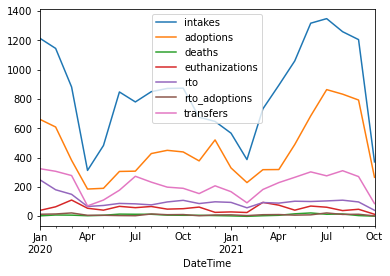

In [79]:
events['2020':'2021'].resample('M').sum().plot()